In [55]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

%matplotlib inline

In [30]:
! ls 3_squares/

2019-08-09-11-36-40.bag  3_squares.png	coordsXYZ1565339797.95.csv


In [92]:
points = np.array( pd.read_csv('3_squares/coordsXYZ1565339797.95.csv') )

In [64]:
x = points[:,0]
y = points[:,1]
z = points[:,2]

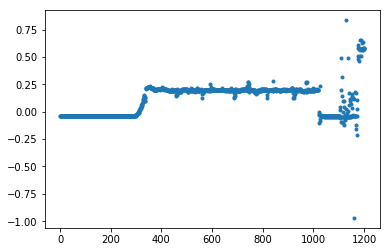

In [38]:
plt.plot(z, '.')

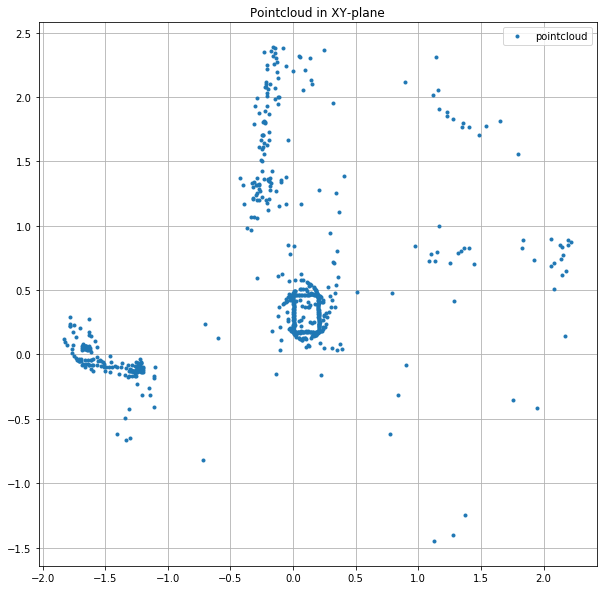

In [37]:
X = x[350:1000]
Y = y[350:1000]
Z = z[350:1000]
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(X,Y, '.', label='pointcloud')
plt.title('Pointcloud in XY-plane')
plt.legend()

In [65]:
def convert2map(points, map_pix, map_size, prob):
    """Converts list of XY points to 2D array map in which each pixel denotes
    probability of pixel being occupied.

    Parameters
    ----------
    points : ndarray
        List of XY points measured by sensor in the map reference frame
    map_pix : int
        Size of map pixel in m
    map_size : tuple
        Size of the map in pixels
    prob : float
        Probability


    Returns
    -------
    map : ndarray
        2D array representing map with dtype numpy.float32
    """
    pixels = (points//map_pix).astype(np.int32)
    mask = (pixels[:, 0] >= 0) & (pixels[:, 0] < map_size[0]) & \
           (pixels[:, 1] >= 0) & (pixels[:, 1] < map_size[1])
    pixels = pixels[mask]
    img = Image.new('L', (map_size[1], map_size[0]))

    data = -np.fromstring(img.tobytes(), np.int8).reshape(map_size)
    data[pixels[:, 0], pixels[:, 1]] = 1
    
    return 0.5 + prob*data.astype(np.float32)

In [91]:
# world params in meters
DIM_X = 5.0 
DIM_Y = 5.0
RESOLUTION = 0.01

LOWEST_X = -2.5
LOWEST_Y = -2.5

grid = np.zeros((int(DIM_X / RESOLUTION), int(DIM_Y / RESOLUTION)))

In [84]:
# def plot_map(grid, x, y, n):
def plot_map(grid):
    plt.figure(figsize=(12,12))
    plt.imshow(grid.T, cmap='gray', extent=[LOWEST_X, LOWEST_X + DIM_X, LOWEST_Y, LOWEST_Y + DIM_Y])
#     plt.plot(x, y, 'g-', label='Robot path')
#     plt.legend(loc=4)
    plt.xlabel("X, m")
    plt.ylabel("Y, m")
    plt.grid()
    plt.show()
    plt.clf()

In [94]:
grids = []
for i in range(points.shape[0]):
    # points in map frame:
    points -= np.array([LOWEST_X, LOWEST_Y, 0])
    layer = convert2map(points, RESOLUTION, (int(DIM_X / RESOLUTION), int(DIM_Y / RESOLUTION)), 0.01)
    I = np.log(layer/(1-layer))
    if i == 0:
        I_sum = I
    else:
        I_sum += I
    grids.append(1/(1 + np.exp(-I_sum)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [90]:
grids[-1]

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]], dtype=float32)

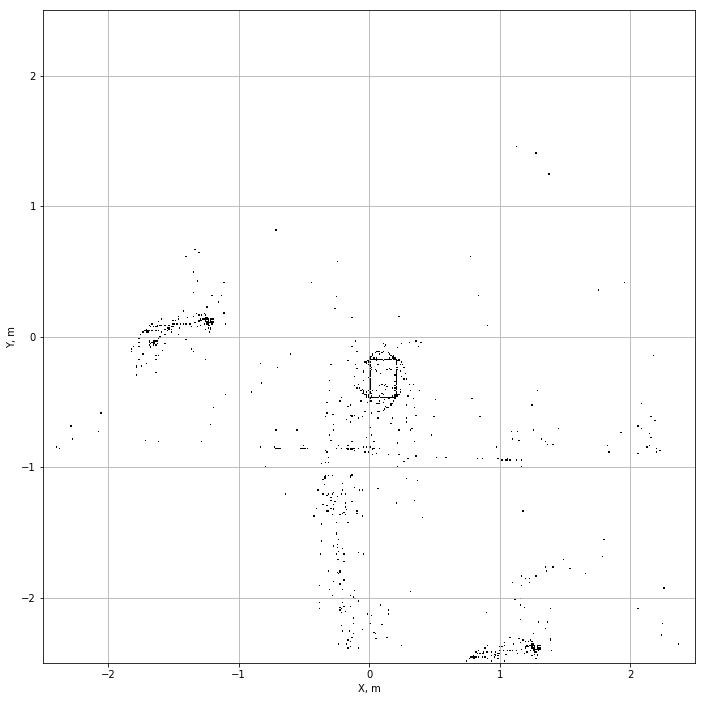

<Figure size 432x288 with 0 Axes>

In [102]:
plot_map(1-grids[-1])